In [39]:
# ==================================
# AUTOMOBILE DATASET
# ==================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [18]:
# Load data
url_auto = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv"
data_auto = pd.read_csv(url_auto)

In [20]:
# Handle missing values
numeric_cols = data_auto.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_auto.select_dtypes(include=['object']).columns

data_auto[numeric_cols] = data_auto[numeric_cols].fillna(data_auto[numeric_cols].mean())
for col in categorical_cols:
    data_auto[col] = data_auto[col].fillna(data_auto[col].mode()[0])

In [21]:
# Features and target
X_auto = data_auto.drop('price', axis=1)
y_auto = data_auto['price']

In [23]:
# Only numeric features for modeling
X_auto_numeric = X_auto.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_auto_scaled = scaler.fit_transform(X_auto_numeric)

In [24]:
# Split data
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(X_auto_scaled, y_auto, test_size=0.2, random_state=42)

In [25]:
# Models
boost_auto = GradientBoostingRegressor(random_state=42)
boost_auto.fit(X_train_auto, y_train_auto)
pred_boost_auto = boost_auto.predict(X_test_auto)

bagging_auto = RandomForestRegressor(random_state=42)
bagging_auto.fit(X_train_auto, y_train_auto)
pred_bagging_auto = bagging_auto.predict(X_test_auto)

In [26]:
# Evaluation
results_auto = {}
for name, y_pred in zip(['Boosting', 'Bagging'], [pred_boost_auto, pred_bagging_auto]):
    results_auto[name] = {
        'MSE': mean_squared_error(y_test_auto, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_auto, y_pred)),
        'R2': r2_score(y_test_auto, y_pred)
    }

print("=== Evaluation on Automobile Dataset ===")
print(pd.DataFrame(results_auto).T)

=== Evaluation on Automobile Dataset ===
                   MSE         RMSE        R2
Boosting  6.436836e+06  2537.092098  0.917447
Bagging   4.811550e+06  2193.524500  0.938291


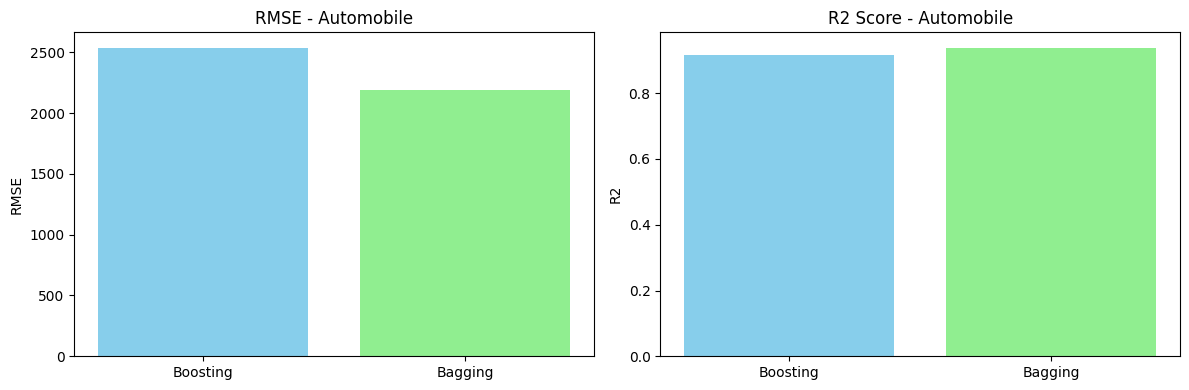

In [41]:
# Visualization
labels = ['Boosting', 'Bagging']
rmse_values = [results_auto['Boosting']['RMSE'], results_auto['Bagging']['RMSE']]
r2_values = [results_auto['Boosting']['R2'], results_auto['Bagging']['R2']]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(labels, rmse_values, color=['skyblue', 'lightgreen'])
plt.title('RMSE - Automobile')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(labels, r2_values, color=['skyblue', 'lightgreen'])
plt.title('R2 Score - Automobile')
plt.ylabel('R2')
plt.tight_layout()
plt.show()

In [27]:
# ==================================
# BOSTON HOUSING DATASET
# ==================================
# Load data
url_boston = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data_boston = pd.read_csv(url_boston)

X_boston = data_boston.drop('medv', axis=1)
y_boston = data_boston['medv']
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

In [28]:
# Models
boost_boston = GradientBoostingRegressor(n_estimators=100, random_state=42)
boost_boston.fit(X_train_boston, y_train_boston)
pred_boost_boston = boost_boston.predict(X_test_boston)

bagging_boston = RandomForestRegressor(n_estimators=100, random_state=42)
bagging_boston.fit(X_train_boston, y_train_boston)
pred_bagging_boston = bagging_boston.predict(X_test_boston)

In [29]:
# Evaluation
results_boston = {}
for name, y_pred in zip(['Boosting', 'Bagging'], [pred_boost_boston, pred_bagging_boston]):
    results_boston[name] = {
        'MSE': mean_squared_error(y_test_boston, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_boston, y_pred)),
        'R2': r2_score(y_test_boston, y_pred)
    }

print("\n=== Evaluation on Boston Housing Dataset ===")
print(pd.DataFrame(results_boston).T)


=== Evaluation on Boston Housing Dataset ===
               MSE      RMSE        R2
Boosting  6.208861  2.491759  0.915334
Bagging   7.901514  2.810963  0.892253


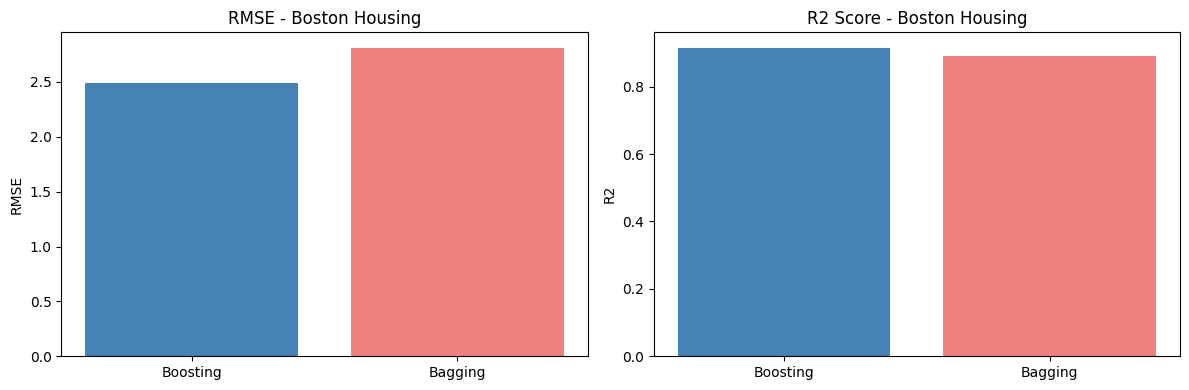

In [42]:
# Visualization
rmse_values = [results_boston['Boosting']['RMSE'], results_boston['Bagging']['RMSE']]
r2_values = [results_boston['Boosting']['R2'], results_boston['Bagging']['R2']]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(labels, rmse_values, color=['steelblue', 'lightcoral'])
plt.title('RMSE - Boston Housing')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(labels, r2_values, color=['steelblue', 'lightcoral'])
plt.title('R2 Score - Boston Housing')
plt.ylabel('R2')
plt.tight_layout()
plt.show()

In [33]:
# ==================================
# INFRARED DATASET
# ==================================
# Load data
url_infrared = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/Infrared.csv"
data_infrared = pd.read_csv(url_infrared)

In [35]:
# Cleaning
numeric_cols_infrared = data_infrared.select_dtypes(include=['float64', 'int64']).columns
data_infrared[numeric_cols_infrared] = data_infrared[numeric_cols_infrared].apply(pd.to_numeric, errors='coerce')
data_infrared_cleaned = data_infrared[numeric_cols_infrared].fillna(data_infrared[numeric_cols_infrared].mean())

X_infrared = data_infrared_cleaned.drop(data_infrared_cleaned.columns[-1], axis=1)
y_infrared = data_infrared_cleaned.iloc[:, -1]
X_train_infrared, X_test_infrared, y_train_infrared, y_test_infrared = train_test_split(X_infrared, y_infrared, test_size=0.2, random_state=42)

In [36]:
# Cleaning
numeric_cols_infrared = data_infrared.select_dtypes(include=['float64', 'int64']).columns
data_infrared[numeric_cols_infrared] = data_infrared[numeric_cols_infrared].apply(pd.to_numeric, errors='coerce')
data_infrared_cleaned = data_infrared[numeric_cols_infrared].fillna(data_infrared[numeric_cols_infrared].mean())

X_infrared = data_infrared_cleaned.drop(data_infrared_cleaned.columns[-1], axis=1)
y_infrared = data_infrared_cleaned.iloc[:, -1]
X_train_infrared, X_test_infrared, y_train_infrared, y_test_infrared = train_test_split(X_infrared, y_infrared, test_size=0.2, random_state=42)

In [37]:
# Models
boost_infrared = GradientBoostingRegressor(n_estimators=100, random_state=42)
boost_infrared.fit(X_train_infrared, y_train_infrared)
pred_boost_infrared = boost_infrared.predict(X_test_infrared)

bagging_infrared = RandomForestRegressor(n_estimators=100, random_state=42)
bagging_infrared.fit(X_train_infrared, y_train_infrared)
pred_bagging_infrared = bagging_infrared.predict(X_test_infrared)

In [38]:
# Evaluation
results_infrared = {}
for name, y_pred in zip(['Boosting', 'Bagging'], [pred_boost_infrared, pred_bagging_infrared]):
    results_infrared[name] = {
        'MSE': mean_squared_error(y_test_infrared, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_infrared, y_pred)),
        'R2': r2_score(y_test_infrared, y_pred)
    }

print("\n=== Evaluation on Infrared Dataset ===")
print(pd.DataFrame(results_infrared).T)


=== Evaluation on Infrared Dataset ===
               MSE      RMSE        R2
Boosting  0.052210  0.228494  0.752058
Bagging   0.058098  0.241035  0.724095


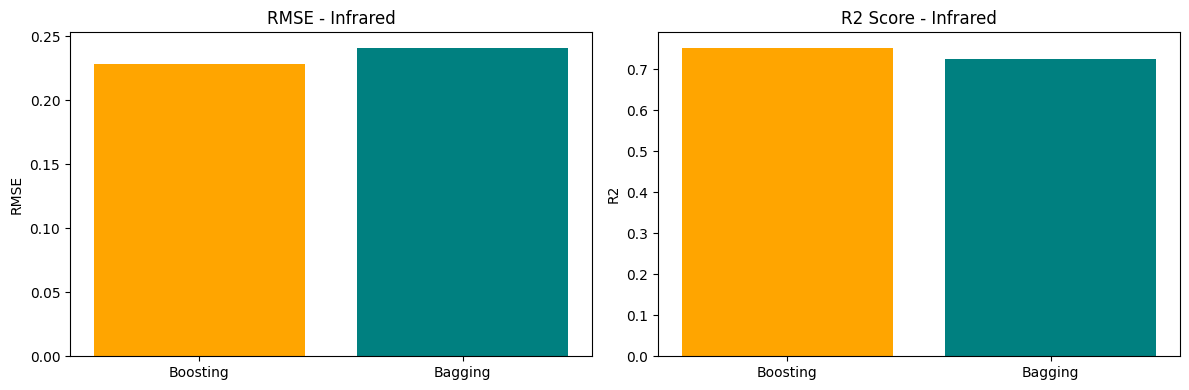

In [43]:
# Visualization
rmse_values = [results_infrared['Boosting']['RMSE'], results_infrared['Bagging']['RMSE']]
r2_values = [results_infrared['Boosting']['R2'], results_infrared['Bagging']['R2']]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(labels, rmse_values, color=['orange', 'teal'])
plt.title('RMSE - Infrared')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(labels, r2_values, color=['orange', 'teal'])
plt.title('R2 Score - Infrared')
plt.ylabel('R2')
plt.tight_layout()
plt.show()

#  Evaluasi Model Regressi – Penjelasan Matematis

## 1. **Mean Squared Error (MSE)**

### Rumus:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \\hat{y}_i)^2
$$

### Keterangan:
- $y_i$: nilai aktual ke-$i$
- $\\hat{y}_i$: nilai prediksi ke-$i$
- $n$: jumlah total data
- $(y_i - \\hat{y}_i)^2$: kuadrat dari selisih antara nilai aktual dan prediksi

> **Tujuan**: Mengukur seberapa besar rata-rata kesalahan kuadrat.  
> Nilai **MSE yang lebih kecil** berarti model memiliki performa yang lebih baik.

---

## 2. **Root Mean Squared Error (RMSE)**

### Rumus:
$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\\frac{1}{n} \sum_{i=1}^{n} (y_i - \\hat{y}_i)^2}
$$

### Keterangan:
- RMSE adalah akar dari MSE
- Karena MSE dalam satuan kuadrat, RMSE mengembalikannya ke satuan asli target

> **Tujuan**: Menginterpretasikan kesalahan dalam satuan asli target (misalnya: harga dalam \$).  
> RMSE lebih intuitif untuk dipahami daripada MSE.

---

## 3. **R-Squared (R²) – Koefisien Determinasi**

### Rumus:
$$
R^2 = 1 - \\frac{\sum_{i=1}^{n} (y_i - \\hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \\bar{y})^2}
$$

### Keterangan:
- $y_i$: nilai aktual ke-$i$
- $\\hat{y}_i$: nilai prediksi ke-$i$
- $\\bar{y}$: rata-rata dari nilai aktual
- Pembilang = jumlah kesalahan model  
- Penyebut = total variasi dalam data aktual

> **Tujuan**: Mengukur seberapa besar proporsi variasi dalam data target yang bisa dijelaskan oleh model.  
> Nilai R² berada dalam rentang $(-\infty, 1]$  
> - $R^2 = 1$: model sempurna  
> - $R^2 = 0$: model tidak lebih baik dari rata-rata  
> - $R^2 < 0$: model lebih buruk dari prediksi rata-rata
